<a href="https://colab.research.google.com/github/HaroldConley/diplomado_BD/blob/main/Evaluaciones/C2/Control2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control 2
Nombre 1: _Puede incluir su nombre acá haciendo doble click_                                                                                                                                      <br> 
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embaro, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día vienres **05 de agosto hasta las 23:59 hrs** para hacer envío de sus respuestas.
Una vez finalizado el desarrollo del test, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Contro2_nombres_integrantes.ipynb`. 
 
 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control2_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo rumorale1@gmail.com, con copia a majorquev@gmail.com con el asunto "DBDC-R-C2: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "DBDC-R-C2" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:01 hrs del sábado 06 de agosto, su nota máxima será un 6.0.

# Sección 1

En la ruta `./datasets` se encuentran los siguientes arhivos, correspondiente a un sondeo de distintos restaurants del estado de California (CA) de EE.UU y sus valoraciones.
El archivo `generalinfo.csv` contiene información propia del restaurant, como tipo de comida ofrecida y valoración de los clientes entre otros.

* `id_restaurant`: Identificador del restaurant valorado. 
* `label`: Nombre del restaurant.
* `food_type`: Tipo de comida ofrecida por el restaurant.
* `review`: Calificación promedio del restaurant otorgada por los usuarios. (valor entre 0 y 1)

Por otra parte, la información contenida en el archivo `location.csv` es la siguiente:

* `id_rest`: Identificador del restaurant valorado.
* `street_num`: Numeración de la ubicación del restaurant.
* `street_name`: Nombre de la calle donde está ubicado el restaurant.
* `city`: Ciudad donde se ubica el restaurant.
* `county_name`: Condado.
* `lat`: Latitud de la dirección.
* `lng`: Longitud de la dirección.
Note que ambas tablas están relacionadas a través de los campos `id_restaurant` y `id_rest`.

## Preliminar 
Cargue los archivos indicados previamente en dos variables, una llamada `general` y otra `location` para  `generalinfo.csv` y `location.csv` respectivamente.

In [1]:
## Carga de archivos
general <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202206_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/generalinfo.csv")
location <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202206_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/location.csv")



In [2]:
getwd()
library("dplyr")

[1] "/content"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
general %>% head
general %>% dim

,id_restaurant,label,food_type,review
,<int>,<chr>,<chr>,<dbl>
1,1,sparky's diner,24 hour diner,2.3
2,2,kabul afghan cuisine,afghani,3.8
3,3,helmand restaurant,afghani,4.0
4,4,afghani house,afghani,3.6
5,5,kabul afghan cusine,afghani,3.7
6,6,bamyan afghan restaurant,afghani,2.8


[1] 9590    4

In [4]:
location %>% head
location %>% dim

,id_rest,street_num,street_name,city
,<int>,<int>,<chr>,<chr>
1,1,242,church st,san francisco
2,2,135,el camino real,san carlos
3,3,430,broadway,san francisco
4,4,1103,e. el camino real,sunnyvale
5,5,833,w. el camino real,sunnyvale
6,6,NA,,san rafael


[1] 9590    4

In [5]:
## Join de las tablas para trabajar directamente con una sola:
genloc <- left_join(general, location, c("id_restaurant" = "id_rest"))
genloc %>% head
genloc %>% dim

,id_restaurant,label,food_type,review,street_num,street_name,city
,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
1,1,sparky's diner,24 hour diner,2.3,242,church st,san francisco
2,2,kabul afghan cuisine,afghani,3.8,135,el camino real,san carlos
3,3,helmand restaurant,afghani,4.0,430,broadway,san francisco
4,4,afghani house,afghani,3.6,1103,e. el camino real,sunnyvale
5,5,kabul afghan cusine,afghani,3.7,833,w. el camino real,sunnyvale
6,6,bamyan afghan restaurant,afghani,2.8,NA,,san rafael


[1] 9590    7

## Preguntas 1.1

**P1a) (1pt)** Basándose en a tabla _general_, ¿cuántos restaurants (id's) distintos hay en total?<br>
**P1b) (1pt)** ¿En cuántos tipos de comida diferentes se clasifican los restaurants?<br>
**P1c) (2pt)** ¿Cuántas ciudades distintas considera el sondeo?<br>
**P1d) (2pt)** ¿Indique el tipo de comida y las ciudades donde se encuentra el restaurant "great wall restaurant"?<br>
**P1e) (2pt)** ¿Cuántos restaurantes de la ciudad de _san francisco_ tienen calificación mayor o igual a 3.8 y venden comida vegetariana (_vegetarian_)?<br>

In [6]:
# Pregunta 1.a.- Basándose en a tabla general, ¿cuántos restaurants (id's) distintos hay en total?
genloc$id_restaurant %>% n_distinct  

## Respuesta: Hay 9590 id's diferentes

[1] 9590

In [7]:
# Pregunta 1.b.- ¿En cuántos tipos de comida diferentes se clasifican los restaurants?
genloc$food_type %>% n_distinct  

## Respuesta: Hay 145 tipos de comida diferente

[1] 145

In [8]:
# Pregunta 1.c.- ¿Cuántas ciudades distintas considera el sondeo?
genloc$city %>% n_distinct  

## Respuesta: Considera 167 ciudades distintas

[1] 167

In [9]:
# Pregunta 1.d.-  ¿Indique el tipo de comida y las ciudades donde se encuentra el restaurant "great wall restaurant"?
genloc %>%
  filter(label == "great wall restaurant")    

## Respuesta: Restaurant de comida "chinese" ubicado en San Francisco y San Leandro

id_restaurant,label,food_type,review,street_num,street_name,city
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
3472,great wall restaurant,chinese,2.0,4542,irving,san francisco
3593,great wall restaurant,chinese,2.5,15048,farnsworth st,san leandro


In [10]:
# ¿Cuántos restaurantes de la ciudad de san francisco tienen calificación mayor o igual a 3.8 y venden comida vegetariana (vegetarian)?
# Pregunta 1.e
genloc %>%
  filter(city == "san francisco" &
          review >= 3.8 &
          food_type == "vegetarian")    

## Respuesta: 3 restaurantes

id_restaurant,label,food_type,review,street_num,street_name,city
<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>
9312,ananda-fuara,vegetarian,3.8,1298,market,san francisco
9314,millennium,vegetarian,3.8,246,mcallister st.,san francisco
9315,now and zen,vegetarian,3.8,1826,buchanan,san francisco


## Preguntas 1.2

**P2a) (2pt)** Sin considerar San Francisco, ¿cuál es la ciudad con mayor cantidad de restaurantes sondeados?<br>
**P2b) (1pt)** ¿Cuáles son los 3 tipos de comida ofrecido más comunes ?<br>
**P2c) (2pt)** Sin con siderar San Francisco, ¿Cuáles son las 3 ciudades con mayor cantidad de restaurants que ofrecen comido tipo _japanese_?<br>
**P2d) (2pt)** Usted decide viajar a una de las ciudades en cuestión, para ello calcula el promedio de las valoraciones medias (promedio de _review_) por cada ciudad, y escoje aquella con mayor review promedio. ¿Qué ciudad escoge? <br>
**P2e) (2pt)** Cuál es la ciudad con mejor valoración promedio de restaurantes tipo "barbeque"<br>


In [11]:
# Pregunta 2.a.- Sin considerar San Francisco, ¿cuál es la ciudad con mayor cantidad de restaurantes sondeados?
genloc %>%
  group_by(city) %>%
  summarize(n_rest = n()) %>%
  filter(city != "san francisco") %>%
  arrange(desc (n_rest)) %>%
  head
  
## Respuesta: San José

city,n_rest
<chr>,<int>
san jose,933
oakland,666
berkeley,327
fremont,267
hayward,223
santa rosa,201


In [12]:
# Pregunta 2.b.- ¿Cuáles son los 3 tipos de comida ofrecido más comunes ?
genloc %>%
  group_by(food_type) %>%
  summarize(n_rest = n()) %>%
  arrange(desc (n_rest)) %>%
  head(3)

## Respuesta: Cafe, chinese y pizza

food_type,n_rest
<chr>,<int>
cafe,1098
chinese,1075
pizza,959


In [13]:
# Pregunta 2.c.- Sin considerar San Francisco, ¿Cuáles son las 3 ciudades con mayor cantidad de restaurants que ofrecen comida tipo japanese?
genloc %>%
  filter(city != "san francisco" &
          food_type == "japanese") %>%
  group_by(city) %>%
  summarize(n_rest = n()) %>%
  arrange(desc(n_rest)) %>%
  head(4)

## Respuesta: San José, Berkeley y Oakland (Nota: agregué la 4ta fila para ver si también tenía 14 restaurantes)

city,n_rest
<chr>,<int>
san jose,28
berkeley,14
oakland,14
santa clara,9


In [15]:
# Pregunta 2.d.- Usted decide viajar a una de las ciudades en cuestión, para ello calcula el promedio de las valoraciones medias (promedio de review) por cada ciudad, y escoje aquella con mayor review promedio. 
# ¿Qué ciudad escoge?
genloc %>%
  group_by(city) %>%
  summarize(rev_avg = mean(review)) %>%
  arrange(desc (rev_avg)) %>%
  head

## Respuesta: Cerritos

city,rev_avg
<chr>,<dbl>
cerritos,3.80
grass valley,3.60
rio del mar,3.60
pescadero,3.50
south lake tahoe,3.15
woodside,3.02


In [16]:
# Pregunta 2.e.- Cuál es la ciudad con mejor valoración promedio de restaurantes tipo "barbeque"
genloc %>%
  filter(food_type == "barbeque") %>%
  group_by(city) %>%
  summarize(rev_avg = mean(review)) %>%
  arrange(desc (rev_avg)) %>%
  head(3)

## Respuesta: Pleasant Hill

city,rev_avg
<chr>,<dbl>
pleasant hill,3.7
castroville,3.0
danville,3.0


## Preguntas 1.3
**P3a) (4pt)** En la pregunta 1d), se pudo observar que un mismo restaurant puede estar presente en más de una ciudad. ¿Cuántos restaurants tienen esta característica, es decir están en más de una ciudad **distinta** ? De ser de utilidad puede investigar y utilizar la función `distinct()`.<br>


**NOTA:** Si bien no es parte del objetivo de este taller, en ocasiones es necesario depurar la información obtenida a modo de trabajar con datos consistentes. En este análisis, en la tabla general, existen nombres de restaurantes que se peuden escribir de distinta manera (incluso con faltas de ortografía), por ejemplo:

  * `"1/4 pound giant burger"` y  `"1/4 pound giant burgers"`
  * `"3.6.9. shanghai restaurant"` y `"3 6 9 shanghai restaurant"`
  * `"zorba's pizza"` y `"zorbas pizza"`

Casos como estos existen muchos en nuestra tabla, pero para nuestros efectos **consideraremos como nombres distintos a aquellos casos como los mencionados anteriormente**.

Una manera de abordar este tipo de inconsistencias es necesario en muchos casos la inclusión de diccionarios y de herramientas que nos permitan manipular texto, e incluso medir el nivel de similitud entre frases.

A modo de ejemplo, se pueden eliminar los puntos, apóstrofes, guiones y otros caracteres de la siguiente manera:

````````
general %>%
    mutate(label = tolower(label)) %>% # se deja todo en minúsculas
    mutate(label = gsub("'","", label)) %>% # se reemplaza "'" por ""  
    mutate(label = gsub(" ","_",label)) %>% # se reemplazan los espacios " " por "_"
    mutate(label = chartr("áéíóú", "aeiou", label)) %>% head() # se eliminan las tildes
````````

De ser de interés, pueden obtener más info sobre manipulación de textos y modelamiento en la siguiente referencia [https://www.tidytextmining.com/](https://www.tidytextmining.com/).<br>
Package para medir similitud entre **palabras**: `stringdist`

<br>

**P3b) (2pt)** ¿Cuál es el restaurant que tiene presencia en la mayor cantidad de **ciudades distintas**?¿En cuántas ciudades está presente?<br>
**P3c) (5pt)** Diremos que un restaurant posee _sucursales_ si en la tabla `general` existe más de un registro con el mismo `label`. Muestre, mediante un gráfico de barras, los 15 restaurants con  mayor cantidad de _sucursales_, donde la altura de la barra representa el total de sucursales de cada restaurant. Su gráfico debe contemplar al menos los siguientes aspectos:
 * Debe contener un título.
 * Debe incluir nombres sugerentes en los ejes.
 * Los nombres de los restaurants deben ser legibles.
 * Los restaurants deben ir ordenados según su cantidad de sucursales.
 * Incluya tiquetas en la parte superior de cada barra, que muestre la cantidad de sucursales respectivas.
 * Las leyendas de cada gráfico no deben visualizarse
 
Como ayuda, puede ser de utilidad investigar la usabilidad de las siguientes funciones de ggplot2.
  * `labs()`: Para la inclusión de nombres en los ejes, títulos, leyenda etc.
  * `geom_label()`; `geom_text()`: para añadir etiquetas esobre las gráficas.
  * `reorder()`: Para reordenar una variable en la función `aes()`.
  * `coord_flip()`: Para invertir ejes.
  * `theme()` en conjunto con `element_text()`: Permite modificar el tema de visualización. Por ejemplo, la siguiente instrucción muestra las etiquetas del eje x con una orientacíón en 45 grados respecto de la posición original:

  ````````
grafico_ggplot +
    theme(axis.text.x=element_text(angle = 45, vjust = .5,hjust = 1))
  ```````` 
 
 A modo de ejemplo puede tener como referencia los siguientes gráficos.
 
 
 
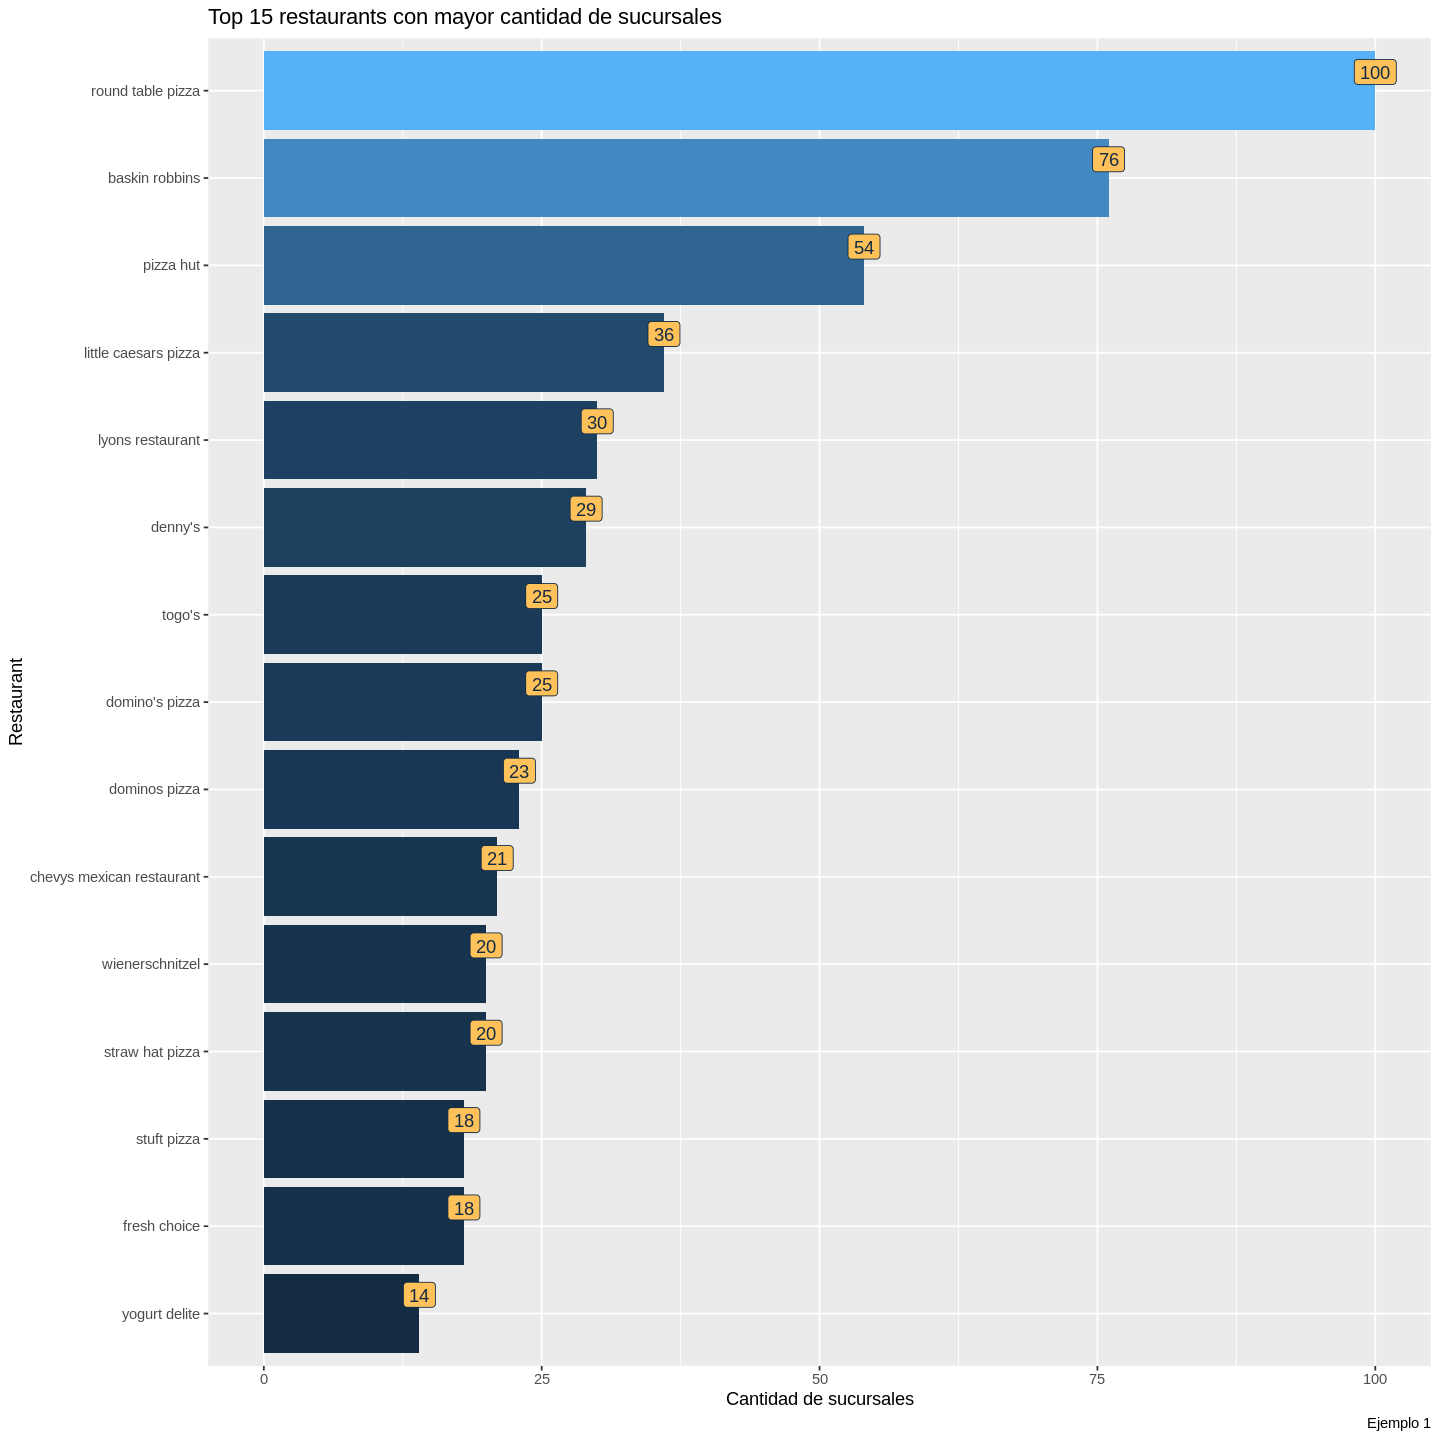 !





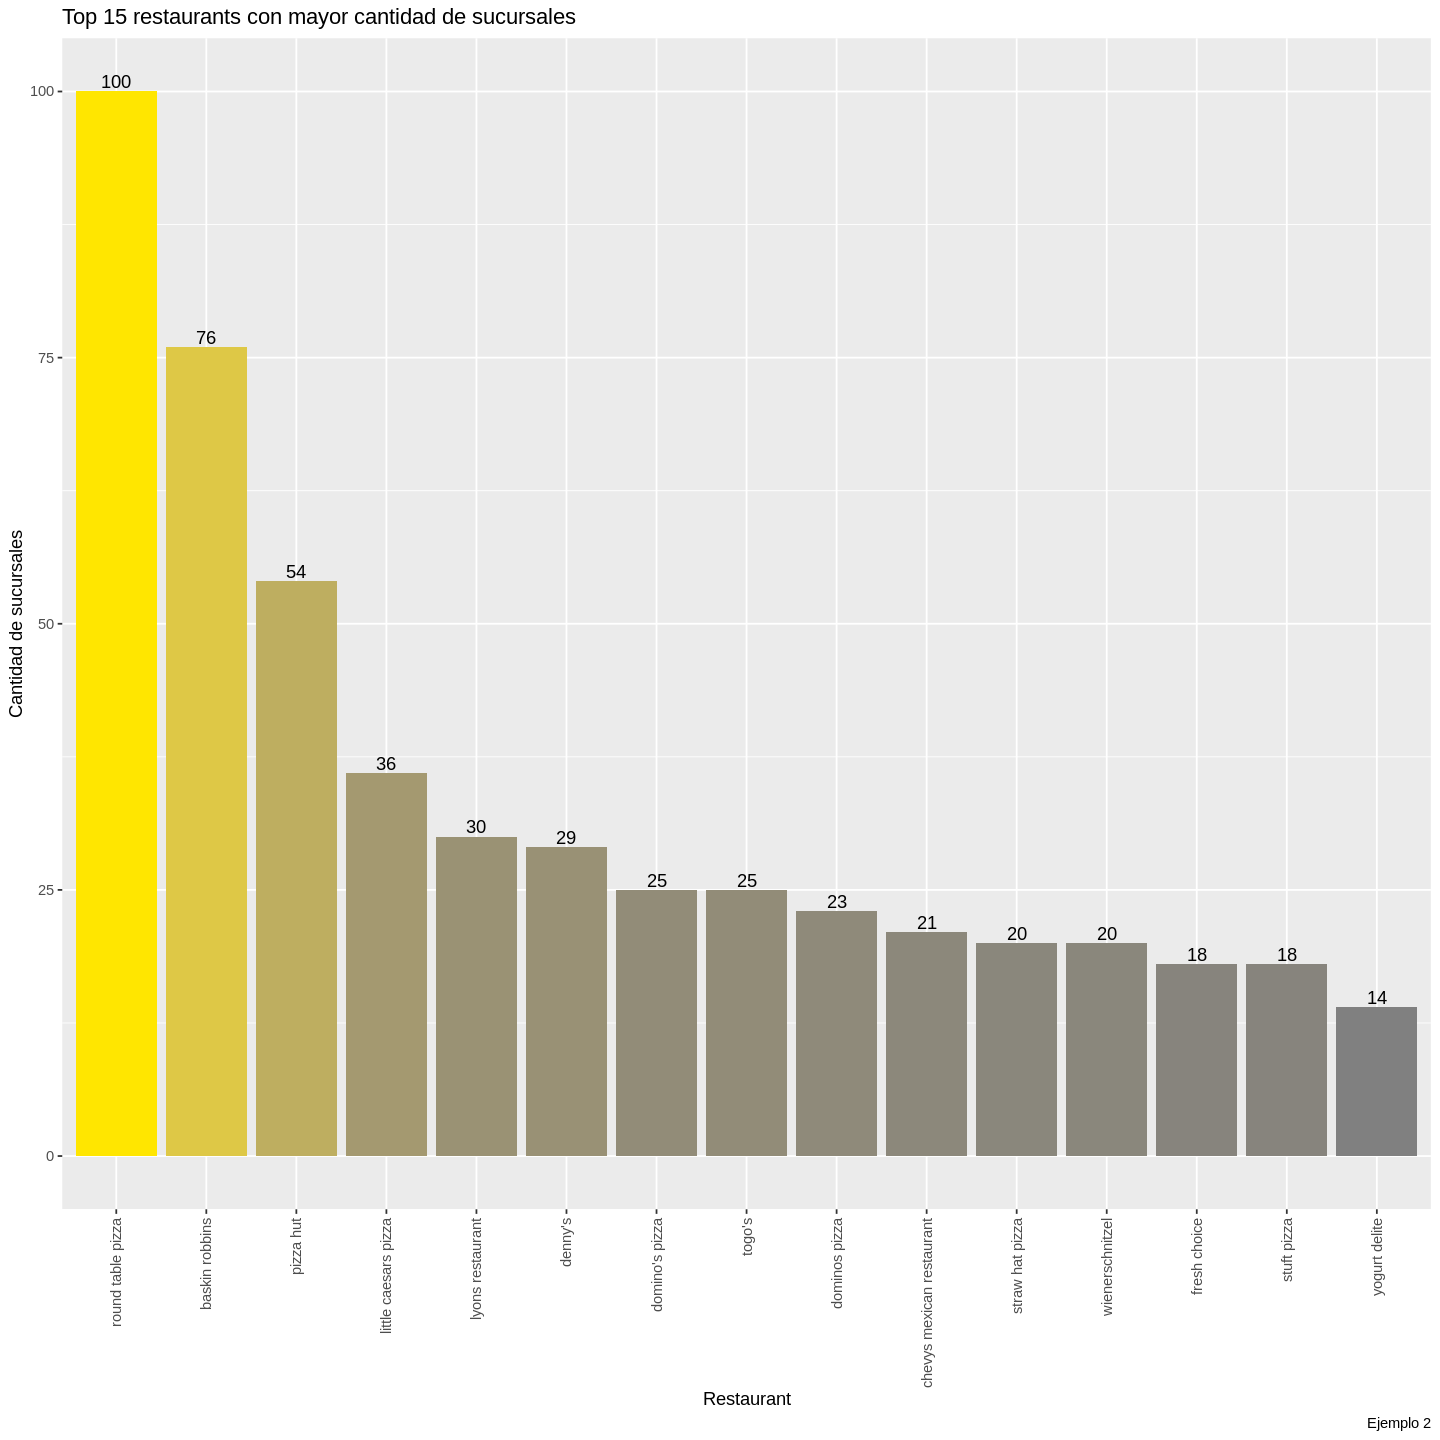



In [17]:
# Pregunta 3.a.- En la pregunta 1d), se pudo observar que un mismo restaurant puede estar presente en más de una ciudad. ¿Cuántos restaurants tienen esta característica, es decir están en más de una ciudad distinta ? 

# Se crea un nuevo DF con una nueva columna que indica el número de ciudades DISTINTAS en donde está ubicado el restaurant.
rest_cities <-  genloc %>%
                  group_by(label) %>%
                  distinct(city) %>%
                  mutate(n_cities = n()) 

# Se filtra el nuevo DF para que muestre solamente los restaurantes que están en más de una ciudad.
rest_cities %>%
  filter(n_cities > 1) %>%
  summarize(n()) %>%
  dim


## Respuesta: Hay 559 restaurantes que están en más de una ciudad distinta.

[1] 559   2

In [18]:
# Pregunta 3.b.- ¿Cuál es el restaurant que tiene presencia en la mayor cantidad de ciudades distintas?¿En cuántas ciudades está presente?
rest_cities %>%
  filter(n_cities > 1) %>%
  summarize(n_cities = n()) %>%
  arrange(desc(n_cities)) %>%
  head(2)

## Respuesta: El restaurant es "Baskin Robbins" y está presente en 49 ciudades distintas. (Nota: revisé las primeras dos filas para verificar que no hubiera un empate).

label,n_cities
<chr>,<int>
baskin robbins,49
round table pizza,44


In [19]:
library("ggplot2")

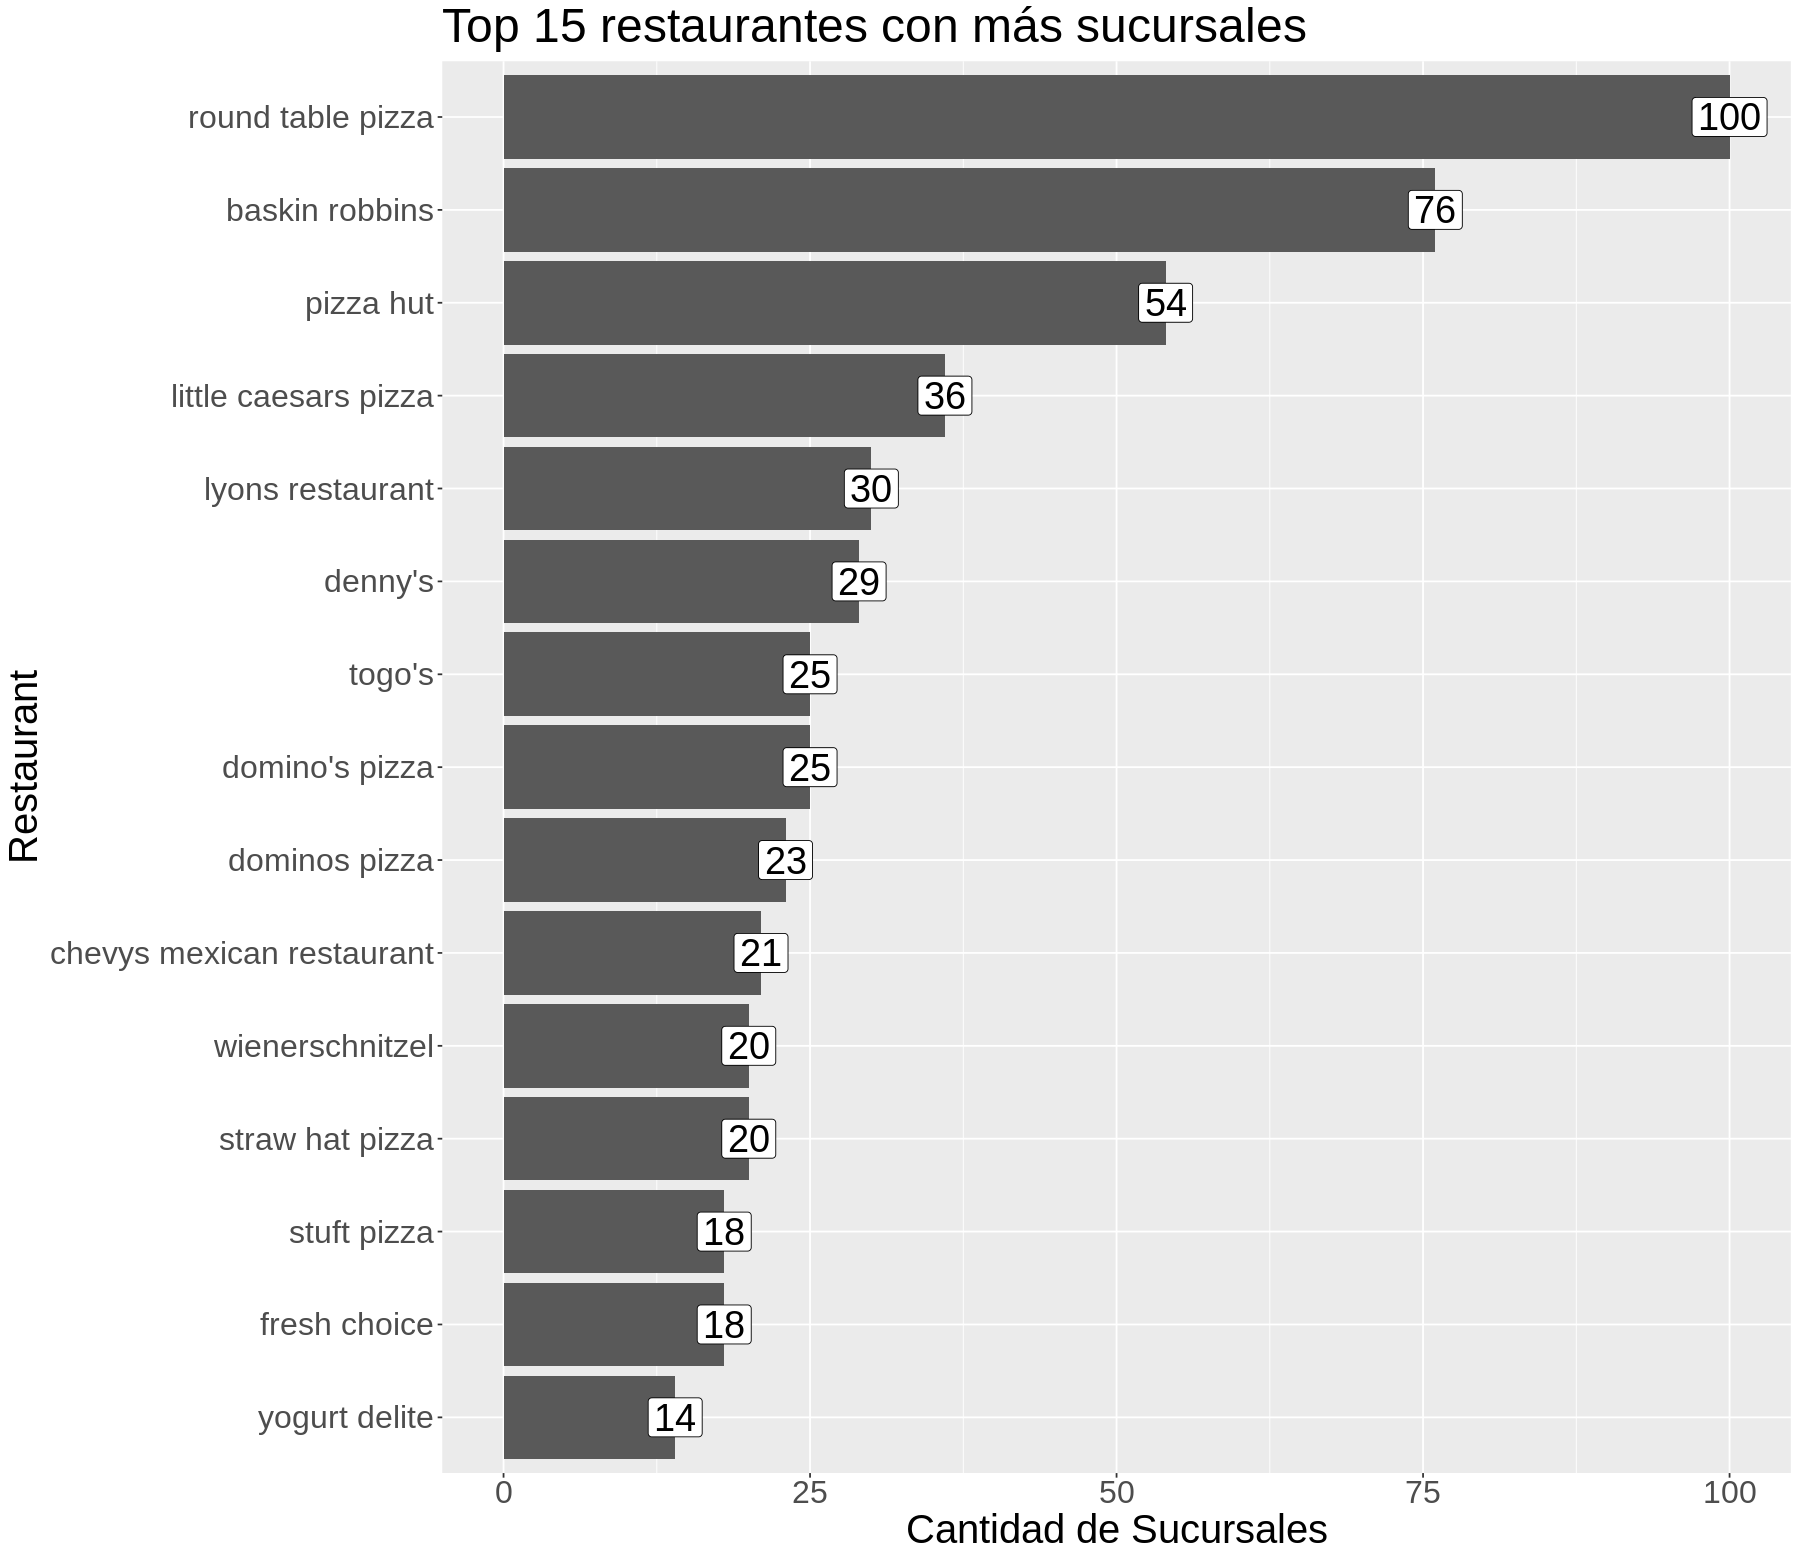

In [20]:
# Pregunta 3.c.- Diremos que un restaurant posee sucursales si en la tabla general existe más de un registro con el mismo label.
# Muestre, mediante un gráfico de barras, los 15 restaurants con mayor cantidad de sucursales, donde la altura de la barra representa el total de sucursales de cada restaurant.

# Se crea un Df con la información a graficar.
top15 <-  general %>%
            group_by(label) %>%
            summarize(n_sucur = n()) %>%
            arrange(desc(n_sucur)) %>%
            head(15)

# Gráfico:
options(repr.plot.width=15, repr.plot.height=13) # Para cambiar el tamaño.

ggplot(top15) +
aes(x = reorder(label, n_sucur), y = n_sucur, label = n_sucur) +
geom_col() +
coord_flip() +
labs(title = "Top 15 restaurantes con más sucursales") +
xlab("Restaurant") +
ylab("Cantidad de Sucursales") +
geom_label(
  data = top15,
  size = 8
) +
theme(text=element_text(size=24))

## Preguntas 1.4

**P4a) (4pts)** Genere una tabla llamada `resumen`, que contenga la siguiente información:

 * `city`: Ciudad
 * `food_type`: Tipo de comida
 * `n_rest`: Cantidad de restaurantes por cada ciudad y tipo de comida.
 * `review_prom`: Valoración promedio por cada ciudad y tipo de comida.
 * `total_rest`: Total de restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).
 * `review_prom_city`: Valoración promedio de los restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).

Su tabla deberá tener la siguiente estructura (la imgen sólo muestra los primeros registros):

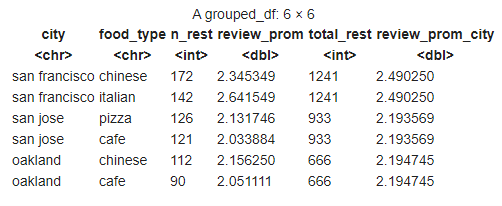

**P4b) (2pts)** Basado en la tabla anterior, construya dos nuevas columnas llamadas `density_food_type` y `ratio_review` que contengan la siguiente información:
 
 * `density_food_type`: Representa el cuociente entre le total de restaurants por tipo de comida y ciudad, respecto del total de restaurantes de la ciudad. (`n_rest/total_rest`)
 * `ratio_review`: Representa el cociente entre a valoración del restaurant por tipo de comida y ciudad, respecto de la valoración promedio de los resturants de la misma ciudad. (`review_prom/review_prom_city`)
 
**P4c) (3pts)** Mediante un gráfico de dispersión, muestre la relación entre `density_food_type` y `ratio_review`. Investigue sobre el parámetro `alpha` dentro de la capa geométrica para una mejor visualizaciónd de los puntos. Adicionalmente añada una curva de tendencia y, con base en él, indique si cabe la posibilidad de establecer algún tipo de dependencia entre `density_food_type` y `ratio_review`.


In [74]:
# Pregunta 4.a.- Genere una tabla llamada resumen, que contenga city, food_type, n_rest, review_prom, total_rest, review_prom_city.

# Genero DFs auxiliares con las columnas necesarias, a partir del DF obtenido del Join de General y Location
aux <- genloc %>%
        group_by(city, food_type) %>%
        summarize(n_rest = n(), review_prom = mean(review)) %>%
        arrange(desc(n_rest))

aux2 <- genloc %>%
          group_by(city) %>%
          summarize(total_rest = n(), review_prom_city = mean(review)) 


# Genero el DF resumen uniendo aux y aux2
resumen <- left_join(aux, aux2, "city")

resumen

`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


city,food_type,n_rest,review_prom,total_rest,review_prom_city
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
san francisco,chinese,172,2.345349,1241,2.490250
san francisco,italian,142,2.641549,1241,2.490250
san jose,pizza,126,2.131746,933,2.193569
san jose,cafe,121,2.033884,933,2.193569
oakland,chinese,112,2.156250,666,2.194745
oakland,cafe,90,2.051111,666,2.194745
san francisco,japanese,89,2.346067,1241,2.490250
san jose,chinese,83,2.190361,933,2.193569
san jose,mexican,83,2.191566,933,2.193569


In [77]:
# Pregunta 4.b.- Basado en la tabla anterior, construya dos nuevas columnas llamadas density_food_type y ratio_review que contengan la siguiente información:
#     density_food_type: Representa el cuociente entre el total de restaurants por tipo de comida y ciudad, respecto del total de restaurantes de la ciudad. (n_rest/total_rest)
#     ratio_review: Representa el cociente entre a valoración del restaurant por tipo de comida y ciudad, respecto de la valoración promedio de los resturants de la misma ciudad. (review_prom/review_prom_city)

resumen <-  resumen %>%
              mutate(density_food_type = n_rest/total_rest,
                      ratio_review = review_prom/review_prom_city)

resumen %>%
  head(6)


city,food_type,n_rest,review_prom,total_rest,review_prom_city,density_food_type,ratio_review
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
san francisco,chinese,172,2.345349,1241,2.490250,0.1385979,0.9418127
san francisco,italian,142,2.641549,1241,2.490250,0.1144239,1.0607568
san jose,pizza,126,2.131746,933,2.193569,0.1350482,0.9718162
san jose,cafe,121,2.033884,933,2.193569,0.1296892,0.9272032
oakland,chinese,112,2.156250,666,2.194745,0.1681682,0.9824605
oakland,cafe,90,2.051111,666,2.194745,0.1351351,0.9345557


In [86]:
??scale_x

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



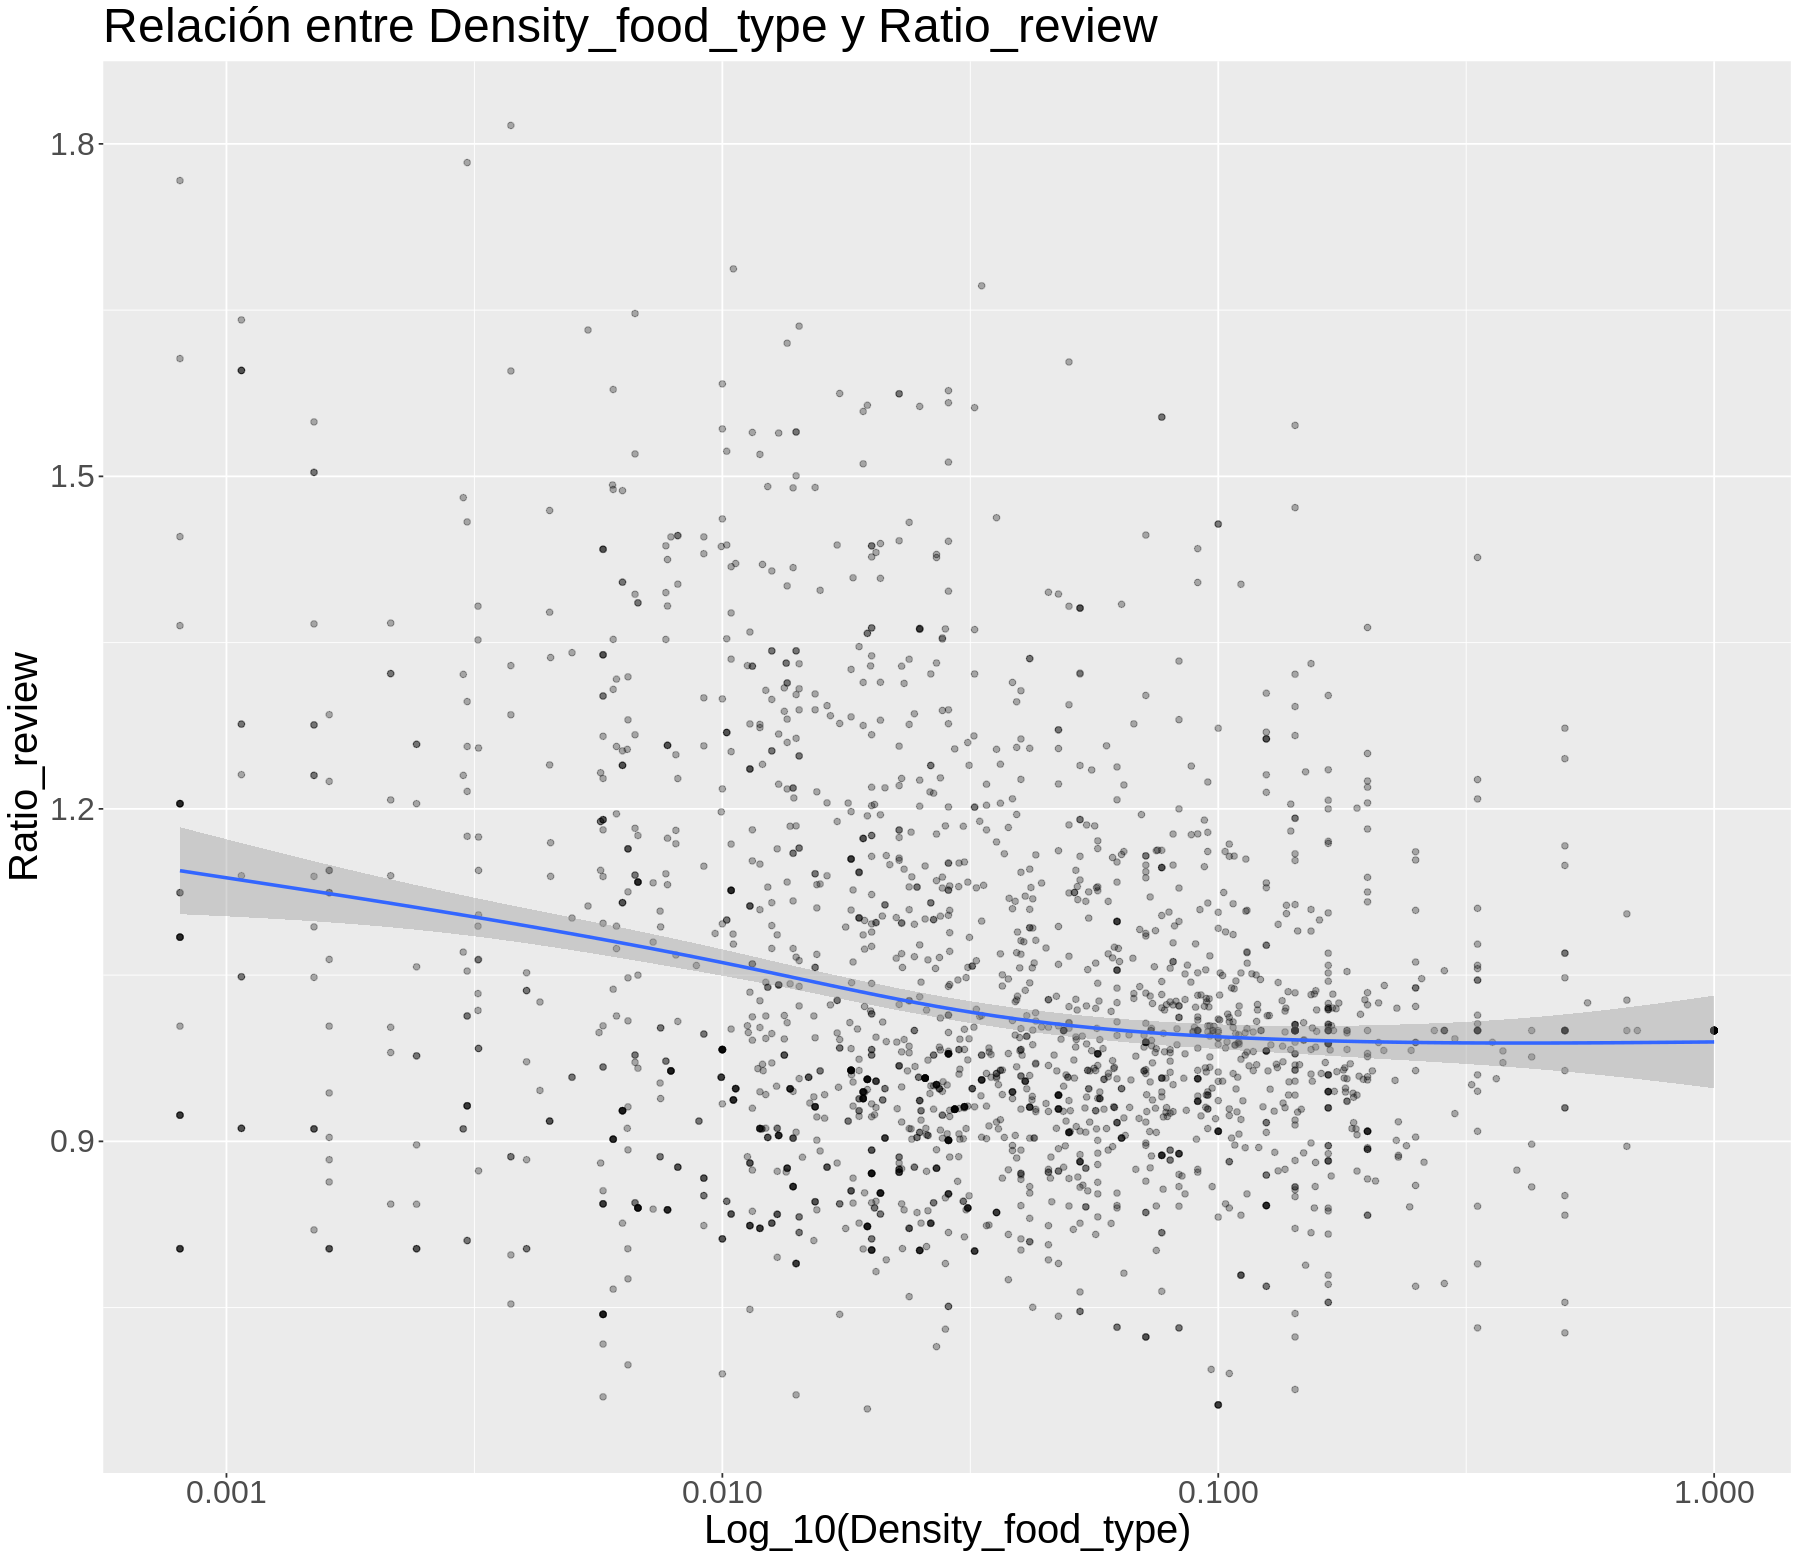

In [92]:
# Pregunta 4.c.- Mediante un gráfico de dispersión, muestre la relación entre density_food_type y ratio_review. 
# Investigue sobre el parámetro alpha dentro de la capa geométrica para una mejor visualizaciónd de los puntos. 
# Adicionalmente añada una curva de tendencia y, con base en él, indique si cabe la posibilidad de establecer algún tipo de dependencia entre density_food_type y ratio_review.

ggplot(resumen) +
aes(x = density_food_type, y = ratio_review) + 
geom_point(alpha = 0.3) +
scale_x_log10() + # Se utilizó la escala logarítmica para visualizar de mejor forma los datos, ya que hay una gran concentración en los primeros valores.
geom_smooth() + 
labs(title = "Relación entre Density_food_type y Ratio_review") +
xlab("Log_10(Density_food_type)") +
ylab("Ratio_review") +
theme(text=element_text(size=24))

# Respuesta: Es difícil hacer alguna afirmación respecto a la relación entre ambas variables, ya que hay una dispersión muy grande de los datos.

## Preguntas 1.5
**P5a) (3pts)** En la tabla `resumen` creada en **P4a)**, genere una nueva columna llamada `type_review`, que contenga "review alto", si `ratio_review >= 1` y "review bajo"  `ratio_review < 1`. ¿Qué indica esta variable? Comente.  <br>
**P5b) (3pts)** Para cada `type_review`, muestre a través de un gráfico de cajas (boxplot), la distribución de la densidad del tipo de comida`density_food_type`. ¿Qué puede observar?<br>

In [ ]:
#########
## Esto  no es necesaria en Rstudio, es sólo para modificar el tamaño de los gráficos desplegados en el notebook
library(repr)
options(repr.plot.width=9, repr.plot.height = 7)
#########

# P1.5
## Respusta 



